# 🚀 First Practice Session

Welcome back!
Today you’ll step into the role of a Data Analyst.
Your task: analyze the dataset daily_sells.csv and uncover trends and insights.
Each row represents one product on one specific day in a supermarket.

#### 🎯 Goals

- Explore the dataset with curiosity.
- Find and ask meaningful questions.
- Experiment and share your findings.

👉 Your results are not graded — the goal is learning, exploration, and creativity!

#### The dataset is not in perfect shape:  
- It contains several data quality issues.  
- All colleagues with domain knowledge are currently on holiday.  

You are responsible for improving the data quality to make meaningful interpretations and analyses become possible.

#### 🔍 Questions to Explore

Here are some guiding questions. Feel free to add your own! You dont need to answer all.

- Sales Drivers

    - Which variables explain Quantity Sold (kilo) best?

- Pricing

    - What is the relation between Wholesale Price (RMB/kg) and Unit Selling Price (RMB/kg)?

- Revenue

    - Which product categories generate the most Umsatz (Revenue)?

- Losses

    - Are there trends in Loss Rate (%)?

- Time Effects

    - Do sales vary by weekday, weekend, week, or month?


#### Steps of EDA from last session as guidance:

0. Install vscode, install python 3.12, create new project, create venv
1. Understand the problem and data
2. Import and inspect the data
3. Handle missing data
4. Explore data characteristics
5. Perform data transformation
6. Visualize data relationships
7. Handle Outliers
8. Communicate findings and insides

Important: Not all steps are always necessary or need to happen in this order

#### Prepare your virtual environment:

Commands to terminal (windows)

- python -m venv .venv 
- .venv\Scripts\activate
- pip install pandas numpy matplotlib seaborn ipykernel

Then select the venv in notebook (vscode: top right)

In [93]:
# import packages

# if you have the error ModuleNotFoundError: No module named 'pandas' -> terminal:  pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Understand the problem and data
The goal is to  analyze the dataset daily_sells.csv and uncover trends and insights. The dataset contains information one product on one specific day in a supermarket.

In [94]:
# 2. Import and inspect the data
df = pd.read_csv('daily_sells - daily_sells.csv')
print("DataFrame successfully loaded.")

DataFrame successfully loaded.


In [30]:
print("\nInitial Data Inspection (df.head()):")
df.tail()


Initial Data Inspection (df.head()):


,Date,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/gram),Item Name_x,Category Code,Category Name,Wholesale Price (RMB/kg),Item Name_y,Weekday,IsWeekend,Loss Rate (%)_entropy
4716,2021-06-24,102900005116509,7.518,0.0026,missing,1011010501,Solanum,1.36,Green Eggplant (1),It would be so helpful to know the weekday,It would be so helpful to know if IsWeekend,5.01_18.497669189727915
4717,2020-12-06,102900005115748,2.024,0.0060,missing,1011010101,Flower/Leaf Vegetables,3.41,White Caitai,It would be so helpful to know the weekday,It would be so helpful to know if IsWeekend,8.78_0.010787151589576993
4718,2021-1-1,102900005115823,5.586,0.0110,Shanghaiqing,1011010101,Flower/Leaf Vegetables,6.15,Shanghaiqing,It would be so helpful to know the weekday,It would be so helpful to know if IsWeekend,14.43_-6.783770667383283
4719,2020-09-30,900051010455,8.171,0.0080,Huangbaicai (2),1011010101,Flower/Leaf Vegetables,5.94,Huangbaicai (2),It would be so helpful to know the weekday,It would be so helpful to know if IsWeekend,15.61_2.366000951349914
4720,2021-02-23,102900005115861,5.816,0.0026,Niushou Youcai,1011010101,Flower/Leaf Vegetables,1.29,Niushou Youcai,It would be so helpful to know the weekday,It would be so helpful to know if IsWeekend,12.17_3.694205949239112


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4721 entries, 0 to 4720
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           4721 non-null   object 
 1   Item Code                      4721 non-null   int64  
 2   Quantity Sold (kilo)           4687 non-null   float64
 3   Unit Selling Price (RMB/gram)  4721 non-null   float64
 4   Item Name_x                    4721 non-null   object 
 5   Category Code                  4721 non-null   int64  
 6   Category Name                  4721 non-null   object 
 7   Wholesale Price (RMB/kg)       4721 non-null   float64
 8   Item Name_y                    4721 non-null   object 
 9   Weekday                        4721 non-null   object 
 10  IsWeekend                      4721 non-null   object 
 11  Loss Rate (%)_entropy          4721 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage:

In [ ]:
df.describe()

In [101]:
# 3. Handle missing data
# Missing data can skew analysis and lead to incorrect conclusions.
median_QuantitySold = df['Quantity Sold (kilo)'].median()
df['Quantity Sold (kilo)'].fillna(median_QuantitySold, inplace=True)

/var/folders/rf/8_ymbgl52r58zqydb_78clm11s1btj/T/ipykernel_53225/1161732168.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity Sold (kilo)'].fillna(median_QuantitySold, inplace=True)


In [ ]:
# 4. Explore data characteristics
# Here, we'll get a statistical summary of the data and look
# at the distribution of variables.)
print(df.describe(include='all'))

In [ ]:
print(df.isnull().sum())

In [ ]:
df['Category Code'].unique()

In [ ]:
# 5. Perform data transformation
# Data transformation prepares the data for visualization and modeling.

df['Category Name'].unique()
df['Category Name'] = df['Category Name'].map({'Edible Mushroom': 0, 'Flower/Leaf Vegetables': 1, 'Capsicum': 2, 'Solanum': 3, 'Aquatic Tuberous Vegetables': 4,'Cabbage':5 })
df['Category Name']


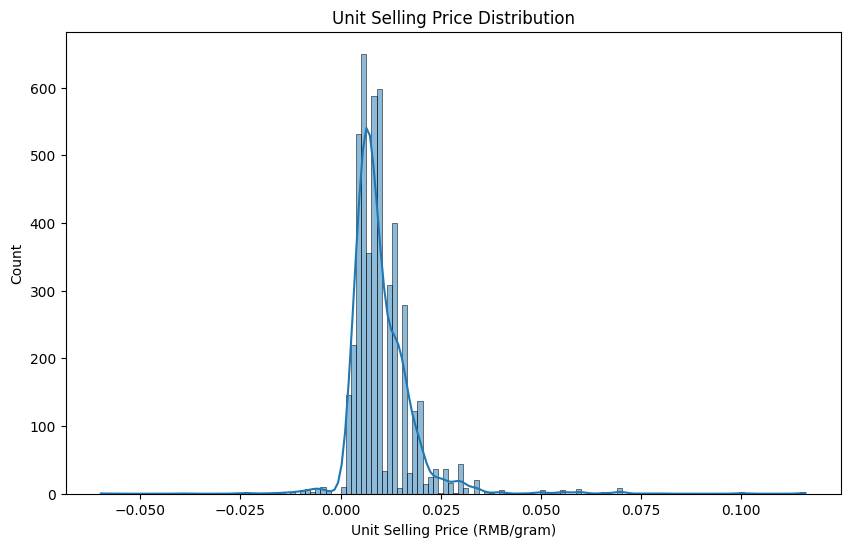

In [99]:
# 6.1 Visualize data relationships a) univariate visualisation (one variable)
plt.figure(figsize=(10, 6))
sns.histplot(df['Unit Selling Price (RMB/gram)'], kde=True)
plt.title('Unit Selling Price Distribution')
plt.xlabel('Unit Selling Price (RMB/gram)')
plt.ylabel('Count')
plt.savefig('Unit Selling Price.png')

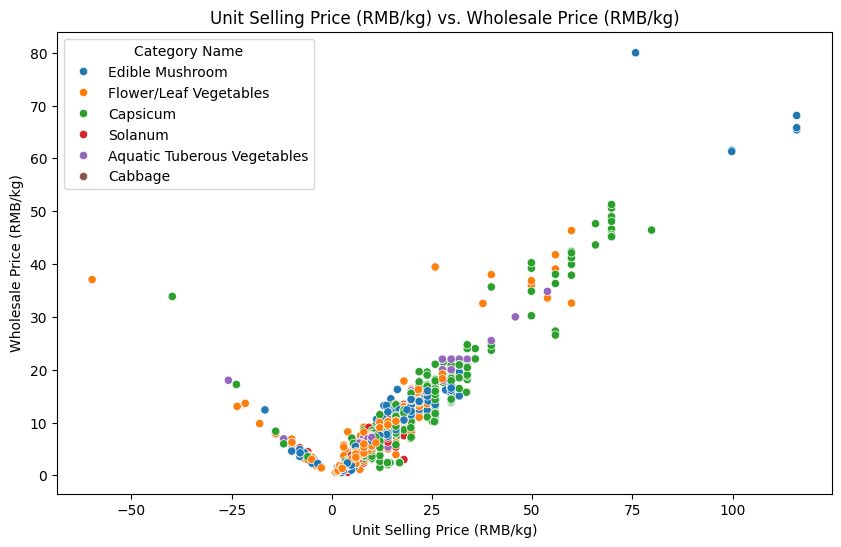

In [ ]:
# 6.2 Visualize data relationships b) multivariate visualisation (2 or more variables)
# Scatter plot
#Wholesale vs Selling Price
df["Unit Selling Price (RMB/kg)"] = df["Unit Selling Price (RMB/gram)"] * 1000
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unit Selling Price (RMB/kg)', y='Wholesale Price (RMB/kg)', hue="Category Name", data=df)
plt.title('Unit Selling Price (RMB/kg) vs. Wholesale Price (RMB/kg)')
plt.xlabel('Unit Selling Price (RMB/kg)')
plt.ylabel('Wholesale Price (RMB/kg)')
plt.savefig('Unit_Wholesale.png')
plt.show()



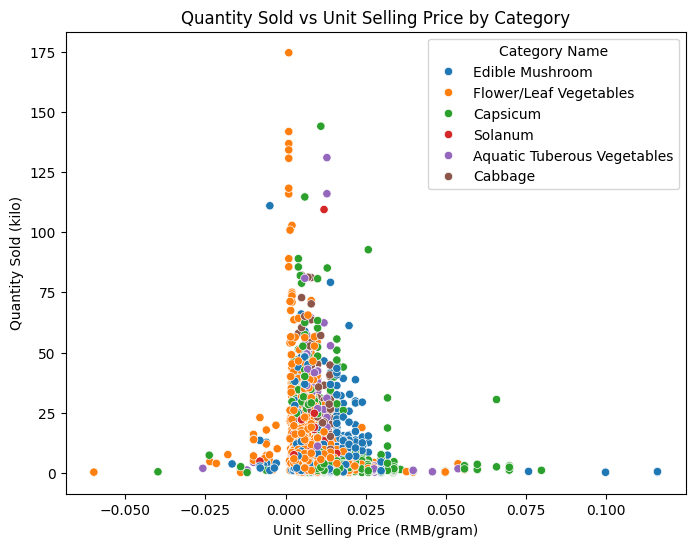

In [ ]:
# 6.2 Visualize data relationships b) multivariate visualisation (2 or more variables)

# Quantity vs Unit Selling Price
plt.figure(figsize=(8,6))
sns.scatterplot(x="Unit Selling Price (RMB/gram)", y="Quantity Sold (kilo)", hue="Category Name", data=df)
plt.title("Quantity Sold vs Unit Selling Price by Category")
plt.show()


Step 7: Handling Outliers


Text(0.5, 0, 'Unit Selling Price (RMB/gram)')

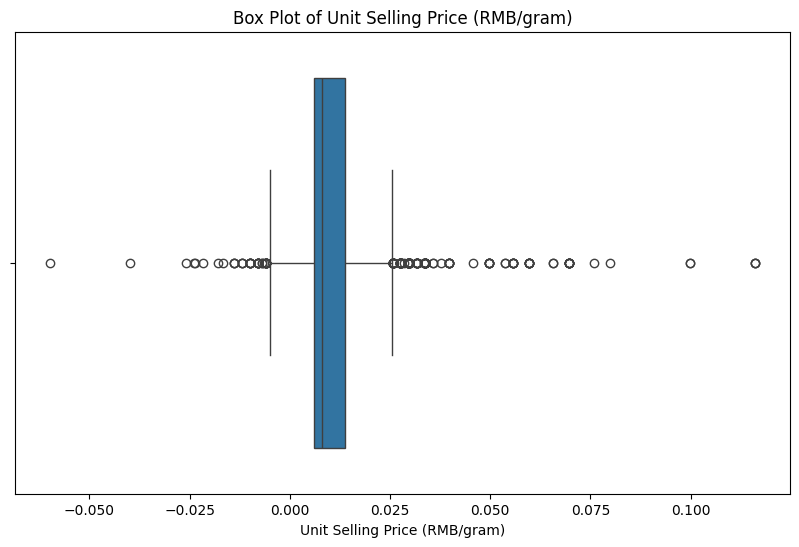

In [95]:
# 7. Handle Outliers

print("\nStep 7: Handling Outliers")

# Use a box plot to visualize outliers in Unit Selling Price (RMB/gram)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Unit Selling Price (RMB/gram)', data=df)
plt.title('Box Plot of Unit Selling Price (RMB/gram)')
plt.xlabel('Unit Selling Price (RMB/gram)')

# 8. Communicate findings and insides
